<a href="https://colab.research.google.com/github/brayannmb/post_storytteling_matplotlib/blob/main/storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aplicando Storytelling com a Biblioteca Matplotlib**

Através desse notebook eu quero compartilhar como você pode aplicar técnicas de Storytelling nos seus gráficos utilizando a biblioteca Matplotlib.


<center><img width="80%" src="https://github.com/brayannmb/post_storytteling_matplotlib/blob/main/chart.jpeg?raw=true"></center>

O Storytelling se tornou uma ferramenta essencial para profissionais que trabalham com dados.

Agora, vamos ao código!

##**Importação das Bibliotecas**

Neste notebook irei utilizar para a visualização gráfica a biblioteca Matplotlib e para obtenção dos dados a bibliotecas Pandas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Obtenção dos Dados**

Para este tutorial irei utilizar uma base de dados relacionada ao Covid-19. O mesmo conjunto de dados que utilizei para realizar um projeto de análise exploratória de dados.

Para quem se interessar, aqui está o link do artigo no Medium. Neste artigo eu apliquei algumas transformações nos gráficos de colunas com intuito de aplicar Storytelling.

In [ ]:
#obtenção dos dados

df = pd.read_csv("https://raw.githubusercontent.com/brayannmb/Data-Science/main/projeto_covid_19/owid-covid-data.csv")

Como são dados que já conheço, irei aplicar uma transformação no tipo de dados da coluna Date, onde o Python está identificando seu tipo primitivo com object. No entanto, esse tipo de dados é prejudicial para manipulação. Sendo assim, irei transformar essa coluna em datetime.

In [ ]:
#transformando a variável date para datetime

df['date'] = pd.to_datetime(df.date)

In [ ]:
print(f'Data mínima: {df.date.min()}')
print(f'Data máxima: {df.date.max()}')

Data mínima: 2020-01-01 00:00:00
Data máxima: 2021-10-23 00:00:00


Nos passos seguintes irei aplicar algumas limpezas de dados para remover valores redundantes, valores ausentes e valores negativos que não condizem com a realidade.

In [ ]:
#criando um novo dataframe 

df_clean= df.loc[(df.iso_code != 'OWID_SAM') & (df.iso_code != 'OWID_AFR') & (df.iso_code != 'OWID_NAM') & (df.iso_code != 'OWID_OCE') & (df.iso_code != 'OWID_ASI') & (df.iso_code != 'OWID_EUR') & (df.iso_code != 'OWID_WRL') & (df.iso_code != 'OWID_EUN')].copy()

In [ ]:
#limpeza de valores negativos 

df_clean.drop(df_clean.loc[df_clean.new_cases < 0].index, axis=0, inplace=True)
df_clean.drop(df_clean.loc[df_clean.new_deaths < 0].index, axis=0, inplace=True)

In [ ]:
#removendo valores ausentes das variáveis new_cases e total_cases
df_clean.dropna(subset = ['new_cases'], axis= 0, inplace=True)
df_clean.dropna(subset = ['total_cases'], axis= 0, inplace=True)
df_clean.dropna(subset = ['new_vaccinations'], axis= 0, inplace=True)

In [ ]:
#separação do dataset para Estados Unidos, Brasil e Mundo

usa = df_clean.loc[(df_clean.location == "United States")].copy()
brazil= df_clean.loc[(df_clean.location == 'Brazil')].copy()
world = df.loc[(df.location == "World")].copy()

#modificando index de ambos os novos datasets

usa.set_index('date', inplace=True)
brazil.set_index('date', inplace=True)
world.set_index('date', inplace=True)

#cores
azul1, azul2, azul3= '#95adbe', '#574f7d', '#3c2a4d'
cinza1, cinza2, cinza3 ='#a9a9a9', '#646464','#242424' 

##**Let´s go!**

Com tudo pronto, agora vamos de fato iniciar o tutorial. No gráfico de linhas que irei aplicar as devidas modificações, eu gostaria de mostrá-lo antes e depois de aplicar as alterações. 

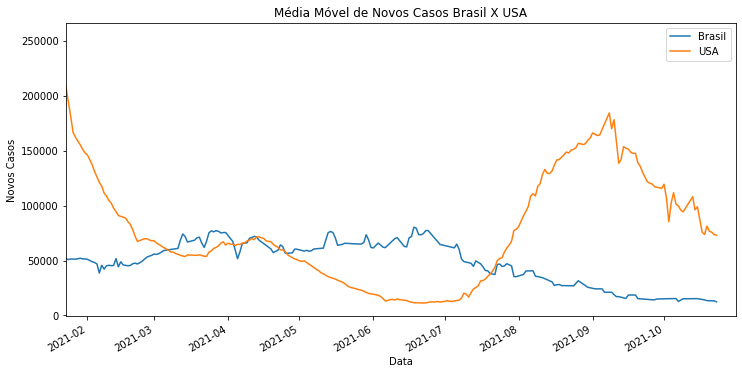

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax, label='Brasil')
usa.new_cases.rolling(window=7).mean().plot(ax=ax, label='USA')

#título e labels
ax.set_title('Média Móvel de Novos Casos Brasil X USA')
ax.set_xlabel("Data")
ax.set_ylabel('Novos Casos')

#legenda
ax.legend()

#removendo valores nulos
ax.set_xlim('2021-01-23', '2021-10-31')

plt.show()

###**1º Passo**

O gráfico acima é uma visualização padrão do Matplotlib para gráficos de linha. Neste tutorial, eu quero te mostrar como você pode aplicar poucas linhas de código e deixar as suas visualizações muito mais explicativas.

Seguindo os passos do post do mestre Carlos, iremos primeiro remover os grids do gráfico, que neste caso são as linhas de borda.

Para isso, utilizamos o comando `ax.spines['posicao'].set_visible(False)`. Para escolher a posição, basta inserir entre os colchetes (colocar entre aspas). Quando aplicamos `False` no método `set_visible`, ele irá remover a visibilidade da borda escolhida.

Neste caso, iremos remover a borda superior e direita.

Para remover a label do eixo x basta passar o valor `None` no método `ax.set_xlabel`.

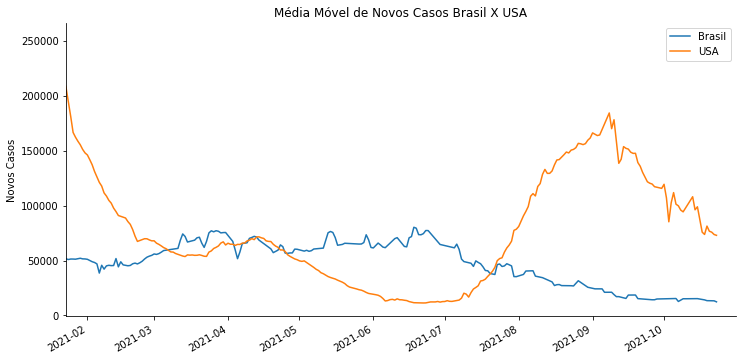

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax, label='Brasil')
usa.new_cases.rolling(window=7).mean().plot(ax=ax, label='USA')

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#título e labels
ax.set_title('Média Móvel de Novos Casos Brasil X USA')
ax.set_ylabel('Novos Casos')
ax.set_xlabel(None)

#legenda
ax.legend()

#removendo valores nulos
ax.set_xlim('2021-01-23', '2021-10-31')

plt.show()

###**2º Passo**

Remover a legenda e rotacionar os valores no eixo x. Caso o seu gráfico possua marcadores de dados, aqui seria uma ótima etapa para removê-los. 

Como neste caso o Matplotlib não gera automaticamente esses marcadores, não precisamos nos preocupar com isso. 

Obs: Isso não quer dizer que você não deve utilizar esses marcadores, mas sim utilizar de uma forma adequada para remover a carga cognitiva de seu gráfico.

Para remover a legenda, você pode apagar a linha `ax.legend()` e retirar as labels no método plot. Neste caso eu acrescentei esses itens para fins didáticos, sendo que não seria necessário acrescentá-los.

Com a legenda removida, agora vamos rotacionar os valores no eixo x para 0º graus, assim, os valores estarão na horizontal. Valores na diagonal dificultam o entendimento dos usuários.

O método `xticks` é o responsável pelas modificações nos valores do eixo x. Para rotação, passamos o valor de 0 graus (`rotation=0`) e para posicionar corretamente os valores centralizados utilizamos a função (`ha='center'`). 

Após seguir esses passos, o resultado esperado deve ser esse: 

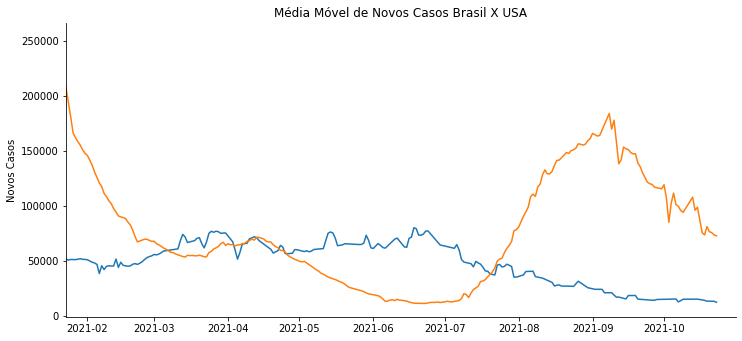

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax)
usa.new_cases.rolling(window=7).mean().plot(ax=ax)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#título e labels
ax.set_title('Média Móvel de Novos Casos Brasil X USA')

#label eixo x
ax.set_ylabel('Novos Casos')
ax.set_xlabel(None)

#ajustando o ângulo no eixo x
plt.xticks(rotation=0, ha='center')

#removendo valores nulos
ax.set_xlim('2021-01-23', '2021-10-31')

plt.show()

###**3º Passo**

A terceira etapa do nosso tutorial será criar uma legenda para as linhas, pois, até o momento não é possível distinguir as informações no gráfico.

Essa etapa é um pouco mais delicada, pois teremos que identificar onde estão o final das linhas no plano cartesiano. As datas serão o nosso eixo x, e no meu caso, o eixo y serão os valores da média de novos casos.

O método que iremos utilizar dessa vez será `.text`, com esse método podemos inserir textos no nosso gráfico.

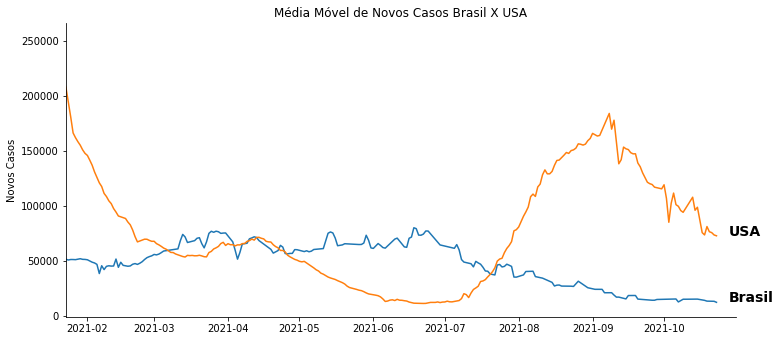

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax)
usa.new_cases.rolling(window=7).mean().plot(ax=ax)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#título e labels
ax.set_title('Média Móvel de Novos Casos Brasil X USA')

#label eixo x
ax.set_ylabel('Novos Casos')
ax.set_xlabel(None)

#ajustando o ângulo no eixo x
plt.xticks(rotation=0, ha='center')

#legenda
plt.text('2021-10-28', 12423, #eixo x e y 
         'Brasil',            #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold')       #colocar a fonte em negrito

plt.text('2021-10-28', 72961, #eixo x e y
         'USA',               #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold')       #colocar a fonte em negrito  


#removendo valores nulos
ax.set_xlim('2021-01-23', '2021-10-31')

plt.show()

###**4º Passo**

Seguindo o princípio da similaridade que a autora cita no livro, iremos deixar as linhas e as legendas com as mesmas cores. 

As cores devem ser escolhidas corretamente, se você deseja destacar uma informação, procure utilizar cores mais escuras e nas demais informações onde deseja tirar o foco, busque por cores mais claras.


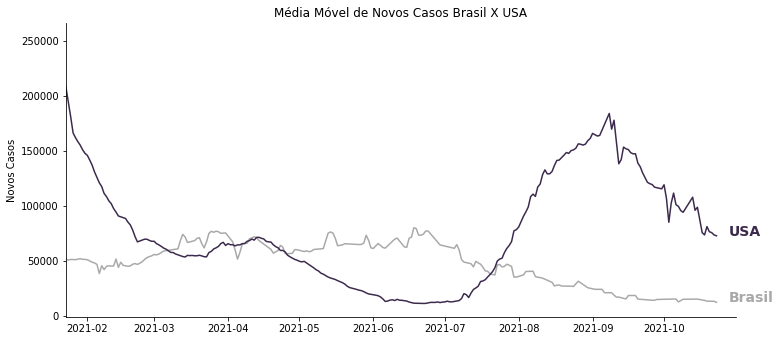

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax, color=cinza1)
usa.new_cases.rolling(window=7).mean().plot(ax=ax, color=azul3)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#título e labels
ax.set_title('Média Móvel de Novos Casos Brasil X USA')

#label eixo x
ax.set_ylabel('Novos Casos')
ax.set_xlabel(None)

#ajustando o ângulo no eixo x
plt.xticks(rotation=0, ha='center')

#legenda
plt.text('2021-10-28', 12423, #eixo x e y 
         'Brasil',            #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold',       #colocar a fonte em negrito 
         color=cinza1)        #cores

plt.text('2021-10-28', 72961, #eixo x e y
         'USA',               #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold',       #colocar a fonte em negrito 
         color=azul3)         #cores

#removendo valores nulos
ax.set_xlim('2021-01-23', '2021-10-31')

plt.show()

###**5º Passo**

Chegamos a penúltima final, onde iremos alterar o título e adicionar um subtítulo para o nosso gráfico.

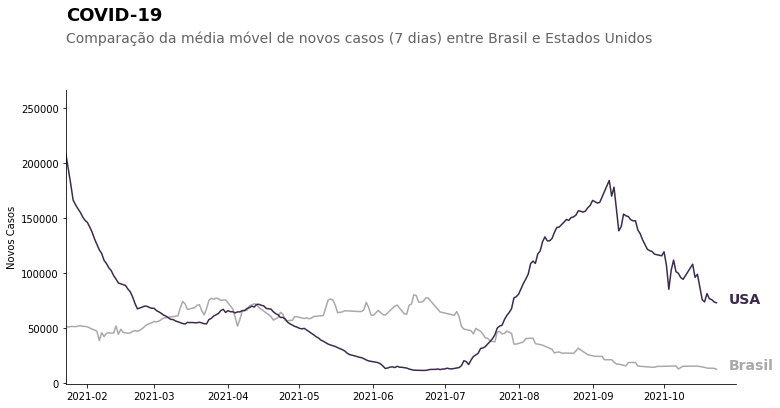

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#plotar gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax, color=cinza1)
usa.new_cases.rolling(window=7).mean().plot(ax=ax, color=azul3)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#título
plt.text('2021-01-23', 330000,  #eixo x e y
         'COVID-19',            #título
         fontsize=18,           #tamanho da fonte
         color='black',         #cores
         weight='bold')         #colocar texto em negrito

#subtítulo
plt.text('2021-01-23', 310000,                         #eixo x e y
         'Comparação da média móvel de novos casos '   #subtítulo
         '(7 dias) entre Brasil e Estados Unidos',     #subtítulo 
         fontsize=14,                                  #tamanho da fonte
         color=cinza2)                                 #cores

#legenda
plt.text('2021-10-28', 12423, #eixo x e y 
         'Brasil',            #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold',       #colocar a fonte em negrito 
         color=cinza1)        #cores

plt.text('2021-10-28', 72961, #eixo x e y
         'USA',               #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold',       #colocar a fonte em negrito 
         color=azul3)         #cores


#removendo label datetime
ax.set_ylabel('Novos Casos')
ax.set_xlabel(None)

#ajustando o ângulo no eixo x
plt.xticks(rotation=0, ha='center')

#removendo valores nulos
ax.set_xlim('2021-01-23', '2021-10-31')

plt.show()

###**6º Passo**

Adicionar um ponto de destaque no nosso gráfico! Essa também é uma etapa muito delicada, você deve escolher a sua big idea, a principal informação que você deseja mostrar.

Eu escolhi uns dos picos mais altos do gráfico para demonstrar a informação, mas no meu caso foi apenas para fins didáticos. Nessa etapa, você pode escolher qualquer ponto do gráfico ou adicionar marcadores de dados em valores específicos.

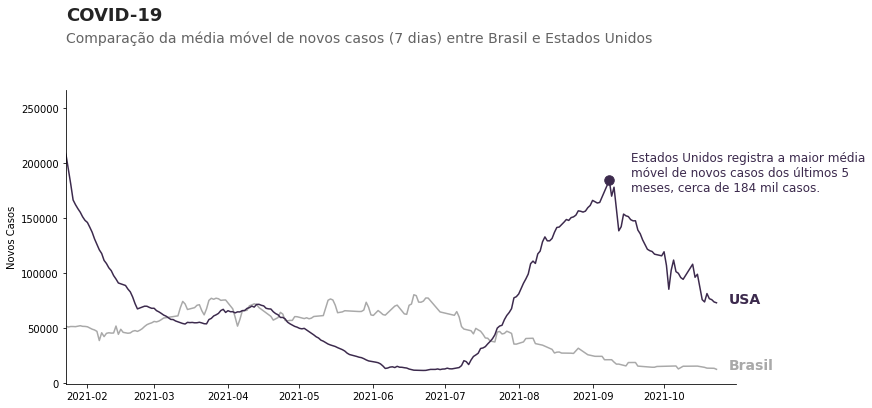

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

#plotar gráfico de linhas
brazil.new_cases.rolling(window=7).mean().plot(ax=ax, color=cinza1)
usa.new_cases.rolling(window=7).mean().plot(ax=ax, color=azul3)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#título
plt.text('2021-01-23', 330000,  #eixo x e y
         'COVID-19',            #título
         fontsize=18,           #tamanho da fonte
         color=cinza3,           #cores
         weight='bold')         #colocar texto em negrito

#subtítulo
plt.text('2021-01-23', 310000,                         #eixo x e y
         'Comparação da média móvel de novos casos '   #subtítulo
         '(7 dias) entre Brasil e Estados Unidos',     #subtítulo 
         fontsize=14,                                  #tamanho da fonte
         color=cinza2)                                  #cores

#legenda
plt.text('2021-10-28', 12423, #eixo x e y 
         'Brasil',            #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold',       #colocar a fonte em negrito 
         color=cinza1)        #cores

plt.text('2021-10-28', 72961, #eixo x e y
         'USA',               #legenda
         fontsize=14,         #tamanho da fonte
         weight='bold',       #colocar a fonte em negrito 
         color=azul3)         #cores

#texto de destaque
plt.text('2021-09-17', 175000, 
         'Estados Unidos registra a maior média\n'
         'móvel de novos casos dos últimos 5\n'
         'meses, cerca de 184 mil casos.', 
         fontsize=12, 
         color=azul3)

#adicionando marcador de dado
ax.scatter(x='2021-09-08', y=184300.571429, s=90, color=azul3)

ax.set_xlim('2021-01-23', '2021-10-31')

ax.set_ylabel('Novos Casos')

#removendo label datetime
ax.set_xlabel(None)

#ajustando o ângulo no eixo x
plt.xticks(rotation=0, ha='center')

plt.show()

Para adicionar o texto, utilizei novamente o método `.text` e para o marcado eu utilizei o método `.scatter` passando como argumento os valores dos eixos x e y, o tamanho do marcador s=90 e a cor utilizei a mesma da linha referente ao Estados Unidos.

#**Thank you!**

Existem diversas maneiras para se chegar no mesmo resultado, acredito que também é possível utilizar outras bibliotecas de visualização para a mesma finalidade. 
Essas dicas não são regras absolutas, foi a maneira que vi de utilizar os aprendizados que a grande autora Cole utilizou no livro.

Espero que tenham gostado do conteúdo. Estou a total disposição para dicas e críticas construtivas para melhorar esse tutorial! Se quiser bater um papo comigo, vamos nos conectar no [Linkedin](https://www.linkedin.com/in/brayan-bento/).